Tarea: 

1) Elegir palabras claves para construir un dataset sobre cierta(s) temática(s)

2) Construir indicadores estadísticos para describir el dataset obtenido
   - Cantidad de noticias
   - Distribución en el tiempo
   - Polaridad de las noticias
   - Organizaciones y personas más mencionadas
  
3) Proponer un método para clasificar las noticias según:
   - su(s) region(es)
   - su(s) comuna(s)

4) A partir de una muestra, evaluar el porcentaje de exactitud de su método. ¿Cuáles son las limitaciones de su método?

5) Mostrar la distribución de las noticias según su comuna y región 

In [576]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re


df1 = pd.read_csv('./data/dataset_chile_latercera_2023.csv')
df2 = pd.read_csv('./data/dataset_2023_elciudadano.csv')
df2['text'] = df2['text'].str.replace(r'googletag\.cmd\.push\([^)]*\) \{[^}]*\}\);', '', regex=True).astype('string')
df = [df1, df2]
# Convertir la columna 'date' al tipo datetime

mandatory = "corrupcion"
palabras_clave = [
    "corrupción", "malversación", "soborno", "fraude", "colusión",
    "coludido", "coludida", "corrupto", "malversado", "asociación ilícita"
]
def calcular_relevancia(texto):
    relevancia = sum(1 for palabra in palabras_clave if palabra in texto)
    return relevancia

for _df in df:
    _df['date'] = pd.to_datetime(_df['date'], format='%b %d, %Y @ %H:%M:%S.%f')
    _df['month'] = _df['date'].dt.strftime('%B')
    # Formatear la columna 'date' al formato YYYY-MM-DD
    _df['date'] = _df['date'].dt.strftime('%Y-%m-%d')
    _df["relevancia"] = _df["text"].apply(calcular_relevancia)

data = [_df[_df["relevancia"] > 0].copy() for _df in df]
data = [_df.sort_values(by="relevancia", ascending=False) for _df in data]

In [525]:
import spacy

nlp = spacy.load("es_core_news_md")

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if (ent.label_ == "PER" or ent.label_ == "ORG") and len(ent.text.split()) >= 2]


data_sample = [_df.copy for _df in data]
all_entities = []

for _df in data:
    _df["entities"] = _df["text"].apply(extract_entities)
    all_entities.append([entity for sublist in _df["entities"] for entity in sublist])



In [526]:
all_entities



[['Convergencia Social',
  'Gonzalo Winter',
  'Fundación Democracia Viva',
  'Democracia Viva',
  'Frente Amplio',
  'Frente Amplio',
  'Frente Amplio',
  'Fidel Espinoza',
  'Frente Amplio',
  'Frente Amplio',
  'Eduardo Ríos',
  'Anticorrupción Metropolitana',
  'Policía de Investigaciones',
  'Enlace Urbano',
  'EnRed Social',
  'Camila Merino',
  'Raúl Torrealba',
  'Evelyn Matthei',
  'Claudia Pizarro',
  'Claudio Castro',
  'Cristóbal Lira',
  'Gonzalo Durán',
  'Claudio Castro',
  'Raúl Torrealba',
  'Vita Deportes',
  'Vita Salud',
  'Consejo de Defensa del Estado',
  'Fiscalía Regional de Tarapacá',
  'Enlace Urbano',
  'Anticorrupción Metropolitana',
  'Policía de Investigaciones',
  'EnRed Social',
  'Democracia Viva',
  'Diego Díaz Sepúlveda',
  'Tiffany Whittaker',
  'Francisco Goñi',
  'Ángel Valencia',
  'Eugenio Campos',
  'Policía de Investigaciones',
  'Eduardo Díaz',
  'Consejo de Defensa del Estado',
  'Servicio de Impuestos Internos',
  'Chile Compra',
  'Eugenio 

In [11]:
from wordcloud import WordCloud

text = [' '.join(ae) for ae in all_entities]

wordcloud = [WordCloud().generate(txt) for txt in text]

plt.figure(figsize=(100,100))
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,1, figsize=(200,100)) 
axarr[0].imshow(wordcloud[0])
axarr[1].imshow(wordcloud[1])

plt.axis("off")
plt.show()

<Figure size 10000x10000 with 0 Axes>

In [551]:
all_entities
entity_counts_lt = pd.Series(all_entities[0]).value_counts()
entity_counts_ec = pd.Series(all_entities[1]).value_counts()


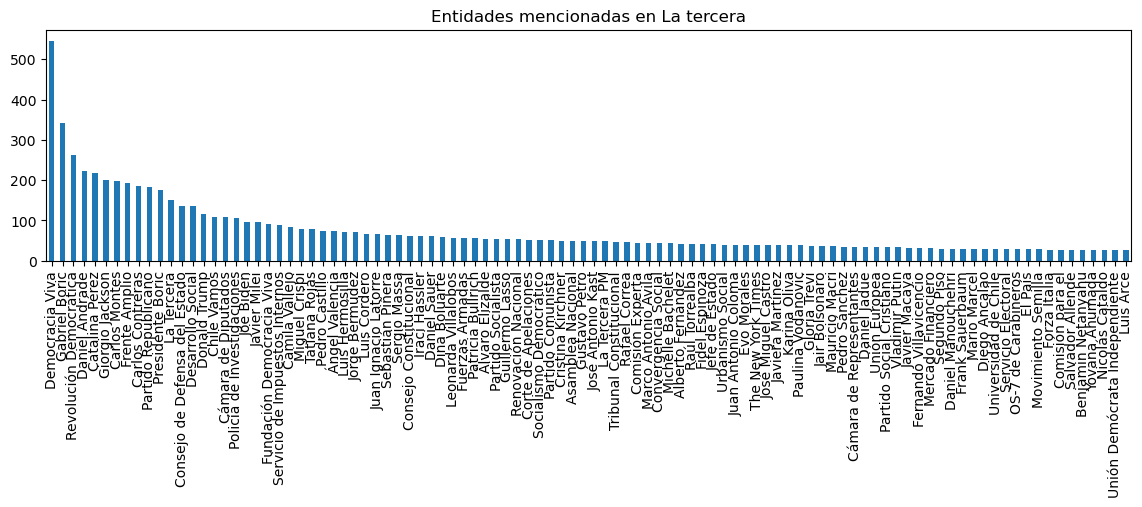

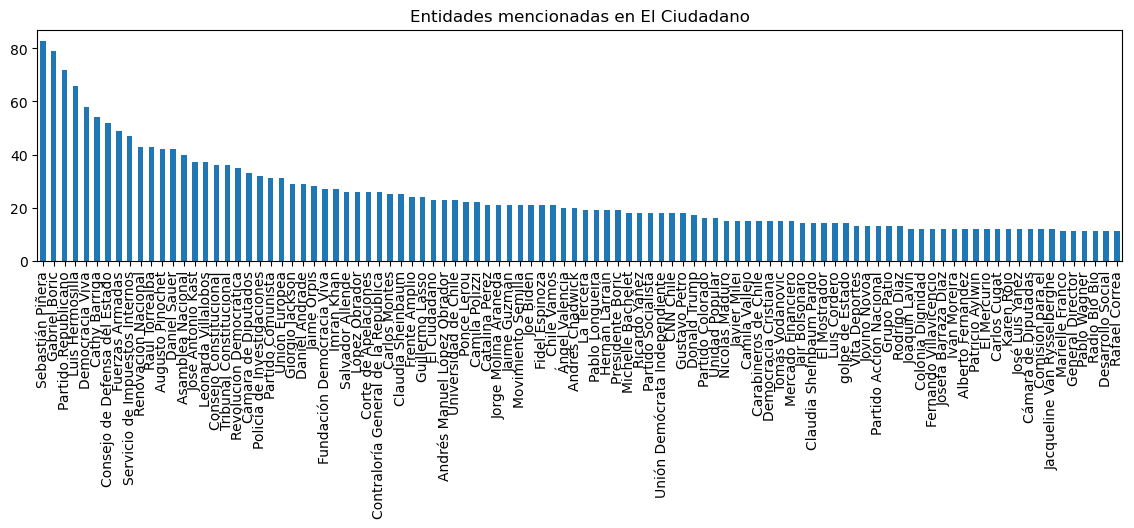

In [613]:
entity_counts_lt[0:100].plot.bar(title="Entidades mencionadas en La tercera", figsize=(14, 3))
plt.show()

entity_counts_ec[0:100].plot.bar(title="Entidades mencionadas en El Ciudadano", figsize=(14, 3))
plt.show()


/var/folders/0v/kbs9l7nx4zbbjp0ppftrhhn00000gn/T/ipykernel_5614/4138936575.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



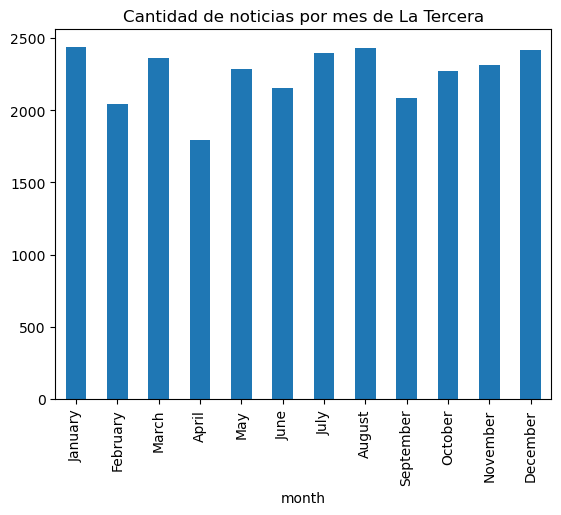

/var/folders/0v/kbs9l7nx4zbbjp0ppftrhhn00000gn/T/ipykernel_5614/4138936575.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



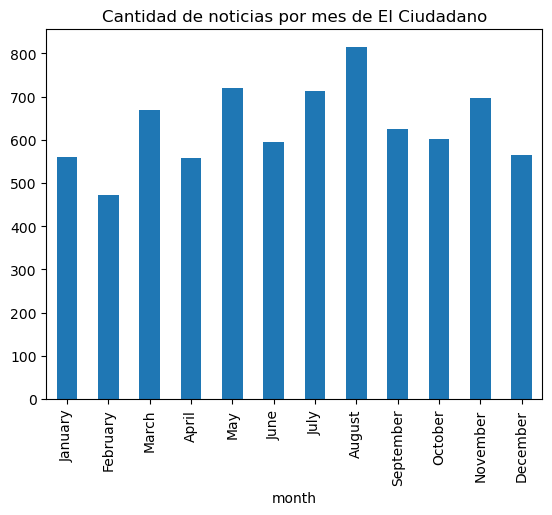

In [598]:
months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df[0]["month"] = pd.Categorical(df[0]["month"], categories = months_categories)
df[1]["month"] = pd.Categorical(df[1]["month"], categories = months_categories)


df[0].groupby('month')['title'].count().plot.bar(title='Cantidad de noticias por mes de La Tercera')
plt.show()

df[1].groupby('month')['title'].count().plot.bar(title='Cantidad de noticias por mes de El Ciudadano')
plt.show()

In [318]:
from meta_ai_api import MetaAI
import time

ai = MetaAI()

for id1, nws in enumerate(news):
    for id2, unw in enumerate(nws):
        if location[id1][id2] == True:
            try:
                response = ai.prompt(message='Encuentra la comuna y región en donde se desarrolla la siguiente noticia. Retorname únicamente las coordenadas geográficas aproximadas en formato DD, grados decimales. No quiero nada más que las coordenadas, ningún otro texto.\n"' + news[id1].to_numpy()[id2] + '"')
                location[id1][id2] = response['message']
                print(id1, id2, location[id1][id2])
            except:
                location[id1][id2] = False
            time.sleep(2)
        else:
            print('')



0 952 -23.6551°, -70.3963°




1 16 -33.4489, -70.6693

1 17 -33.4372°, -70.6736°

1 18 -33.4489°, -70.6693°



1 20 -33.4569°, -70.6483°



1 22 -36.5333, -71.9333



1 24 -36.0333°, -71.5333°



1 26 -20.2167°, -70.15°



1 29 -51.7167°, -72.4833°

1 30 -33.4477°, -70.6736°



1 32 -33.0459, -71.5319

1 33 -33.447487, -70.673676



1 40 -33.4489, -70.6693

1 41 -33.45, -70.5833



1 44 Sorry, I can’t help you with this request right now. Is there anything else I can help you with?

1 45 -23.6533° S, 70.3925° O

1 46 -33.35, -70.57



1 48 Sorry, I can’t help you with this request right now. Is there anything else I can help you with?

1 49 -33.4563, -70.6736



1 51 -33.4167°, -70.5667°

1 52 -33.6167, -70.5667



1 54 -33.447487, -70.673676



1 56 -33.5142, -70.7833

1 57 -36.7667, -73.0667

1 58 19.4326° N, 99.1332° O

1 59 -33.4489, -70.6693

1 60 -33.5142°, -70.7833°

1 61 -33.35, -71.6667

1 62 -33.4167°, -70.5667°



1 64 22.9933° -99.0333°

1 65 -0.2167°, -78.5°

1 66 -33.45, -70.60



1 68 19.4328, -99.1332

1 69 -33.3833°, -70.5833°

1 70 -33.3833°, -70.5833°



1 72 -20.2167°, -70.15°

1 73 -33.4489°, -70.6693°

1 74 -33.4489°, -70.6693°



1 78 -23.6458°, -70.3947°

1 79 -33.4372°, -70.6504°



1 81 -23.6458, -70.3954



1 87 -23.6533°, -70.3943°

1 88 -33.4372°, -70.6506°

1 89 -33.4569, -70.6693



1 93 -34.1667°, -70.7333°

1 94 -33.3833, -70.5833

1 95 -33.4561, -70.6693

1 96 -33.4489, -70.6693

1 97 -23.6453°, -70.3953°

1 98 -33.5923, -70.6939



1 101 -33.4489°, -70.6693°

1 102 -33.45, -70.67

1 103 -33.4489, -70.6693



1 105 -33.45, -70.67



1 109 -33.55, -70.55



1 113 -33.4489°, -70.6693°

1 114 -33.05, -71.60

1 115 -36.8233, -73.0500



1 117 24.7908° N, 107.3878° O

1 118 -21.4667°, -68.6333°

1 119 -23.6458, -70.3967

1 120 19.4326° N, 99.1332° O

1 121 -33.3833°, -70.5667°



1 123 -33.5142°, -70.7833°

1 124 -33.55, -70.5833



1 126 -33.45, -70.67

1 127 19.4326° N, 99.1332° W

1 128 -33.366667, -71.666667



1 131 -33.5167°, -70.7833°



1 136 -33.35, -70.57

1 137 -33.45, -70.67

1 138 -33.4258°, -70.5661°

1 139 19.0500° N, 98.2000° O



1 141 -33.4489, -70.6693

1 142 8.966667, -66.866667



1 144 -33.3833°, -70.5833°

1 145 16.7036° N, 96.7169° O



1 147 33.7292° N, 73.0936° E



1 149 -33.4489°, -70.6693°

1 150 -36.5333, -72.3333

1 151 -33.35, -70.55

1 152 19.0667° N, 96.1° W

1 153 -41.4733, -72.9433

1 154 -38.7333, -72.5833



1 156 -33.45, -70.6667

1 157 -33.4489, -70.6693

1 158 -33.447487, -70.673676



1 160 -23.6454°, -70.3967°

1 161 -0.2292°, -78.5243°

1 162 -33.0242°, -71.5517°



1 167 No puedo proporcionar las coordenadas geográficas, ya que la noticia no menciona una ubicación específica. ¿Hay algo más en lo que pueda ayudarte?

1 168 -38.7333, -72.6333

1 169 -33.4489°, -70.6693°



1 171 19.0333° N, -98.2° O

1 172 No hay coordenadas geográficas que se puedan extraer de esta noticia, ya que no menciona una ubicación específica.

1 173 19.4326° N, 99.1332° O

1 174 -33.4561°, -70.6736°

1 175 -33.4489, -70.6693

1 176 -23.6458, -70.3967

1 177 19.4328° N, 99.1333° O

1 178 -33.6333°, -70.8167°

1 179 -37.4667, -73.2833



1 182 -33.4456°, -70.6733°



1 190 -33.3667°, -71.6667°



1 195 -33.448611, -70.669444

1 196 -33.4372°, -70.6736°

1 197 -29.95, -71.35



1 200 -34.6037, -58.3816

1 201 -33.5333°, -70.6667°



1 207 21.0167° N, 101.2667° O



1 210 -33.45, -70.67

1 211 -33.4561°, -70.6693°



1 213 -33.4569, -70.7622



1 215 -33.4489°, -70.6693°

1 216 -33.45, -70.67



1 219 -33.448611, -70.669444



1 221 -27.3667, -70.3333

1 222 -23.5453, -70.3967

1 223 -33.05, -71.50

1 224 -33.4372°, -70.6483°



1 226 -33.4378°, -70.6505°

1 227 -33.3833°, -70.5667°

1 228 -33.447487, -70.673676



In [319]:
location

[['-23.6454°, -70.3967°\n',
  '-20.4833°, -70.15°\n',
  '-33.3833°, -70.5833°\n',
  '-33.45, -70.67 y -20.59, -70.13\n',
  '-33.44787, -70.67362\n',
  '-36.8667, -72.3167\n',
  '-33.4569, -70.6693\n',
  '-33.45, -70.65\n',
  '-33.45, -70.67\n',
  '-23.6553°, -70.3953°\n',
  '-23.6458°, -70.3967°\n',
  '-33.45, -70.6667\n',
  '-33.05, -71.60\n',
  '-33.4489°, -70.6693°\n',
  '-33.3928, -70.7859\n',
  '-33.45, -70.6\n',
  '43.6532° N, 79.3832° W\n',
  '-33.4241°, -70.6477°\n',
  '-0.22, -78.5\n',
  '-33.4489°, -70.6693°\n',
  '-33.45, -70.60\n',
  '-12.0464°, -77.0428°\n',
  '-33.3833°, -70.5667°\n',
  '-33.4489°, -70.6693°\n',
  '-33.45, -70.67\n',
  '-33.45, -70.67\n',
  '14.6408° N, 90.5018° O\n',
  '-33.448611, -70.669444\n',
  '32.0833° N, 34.7667° E\n',
  '-23.5477, -70.3967\n-28.4657, -70.7364\n-30.3828, -71.4056\n-34.0779, -70.7359\n-35.4393, -71.6414\n-37.4733, -72.7103\n-38.7434, -72.5804\n-39.8385, -73.2425\n-45.5592, -72.6769\n',
  '48.6167, 39.2833\n',
  '-23.6458, -70.3967\

In [258]:
locations = location 

print(len(locations), len(locations[0]),len(locations[1]))
locationsArray = []

size = 0;
index = 0;
data


for _df in data:
    print(len(_df['title']))
    titleIndex = 0
    for idx in _df.index:
        latlng = ''
        if (locations[index][titleIndex] != False and locations[index][titleIndex] != True):
            latlng = locations[index][titleIndex]
            latlng = latlng.split('\n')[0]
            latlng = latlng.split('y')[0]
        splitted = latlng.split(',')
        locationsArray.append({
            'title': _df['title'][idx],
            'text': _df['text'][idx],
            'source': _df['media_outlet'][idx],
            'lat':  splitted[0] if len(splitted) == 2 else None,
            'lng': splitted[1] if len(splitted) == 2 else None,
            'latlng': latlng,
            'original': locations[index][titleIndex]
        })
        titleIndex += 1
        
    index += 1

df_locations = pd.DataFrame(locationsArray)
df_locations
        

2 1676 585
1676
585


,title,text,source,lat,lng,latlng,original
0,Gonzalo Winter (CS): “Ningún partido puede pre...,El diputado de Convergencia Social (CS) Gonzal...,latercera,-23.6454°,-70.3967°,"-23.6454°, -70.3967°","-23.6454°, -70.3967°\n"
1,Lío de platas arista Tarapacá: fiscal jefe de ...,Las investigaciones iniciadas por el Ministeri...,latercera,-20.4833°,-70.15°,"-20.4833°, -70.15°","-20.4833°, -70.15°\n"
2,Grupo transversal de alcaldes se reúne con Cam...,Un grupo de alcaldes del oficialismo y la opos...,latercera,-33.3833°,-70.5833°,"-33.3833°, -70.5833°","-33.3833°, -70.5833°\n"
3,Lío de platas arista Tarapacá: PDI allana sede...,Continúan las diligencias en el marco de las i...,latercera,-33.45,-70.67,"-33.45, -70.67","-33.45, -70.67 y -20.59, -70.13\n"
4,Cumbre por líos de platas en la Fiscalía Nacio...,Por segunda vez desde que estallaron los casos...,latercera,-33.44787,-70.67362,"-33.44787, -70.67362","-33.44787, -70.67362\n"
...,...,...,...,...,...,...,...
2256,¿Quiénes son los ‘terroristas’ que Boluarte se...,Una de las principales luchas que libran los m...,elciudadano,None,None,,False
2257,"Reestrenan «Clase de ética», obra teatral en c...",Tras el exitoso estreno que experimentó la obr...,elciudadano,None,None,,False
2258,Ex comandante en Jefe Ricardo Martínez deberá ...,"El excomandante en jefe del Ejército, Ricardo ...",elciudadano,None,None,,False
2259,Ladrón de libros que robó más de 1.000 manuscr...,El ex empleado de la editorial Simon & Schuste...,elciudadano,None,None,,False


In [320]:

toMaps = df_locations.copy()

toMaps['lat'] = toMaps['lat'].replace("\°", "",regex=True)
toMaps['lat'] = toMaps['lat'].replace(' ', '',regex=True)
toMaps['lat'] = toMaps['lat'].replace('N', '',regex=True)
toMaps['lat'] = toMaps['lat'].replace('S', '',regex=True)
toMaps['lat'] = toMaps['lat'].replace('E', '',regex=True)
toMaps['lat'] = toMaps['lat'].replace('W', '',regex=True)

toMaps['lng'] = toMaps['lng'].replace('°', '', regex=True)
toMaps['lng'] = toMaps['lng'].replace(' ', '', regex=True)
toMaps['lng'] = toMaps['lng'].replace('N', '', regex=True)
toMaps['lng'] = toMaps['lng'].replace('S', '', regex=True)
toMaps['lng'] = toMaps['lng'].replace('E', '', regex=True)
toMaps['lng'] = toMaps['lng'].replace('W', '', regex=True)

toMaps

,title,text,source,lat,lng,latlng,original
0,Gonzalo Winter (CS): “Ningún partido puede pre...,El diputado de Convergencia Social (CS) Gonzal...,latercera,-23.6454,-70.3967,"-23.6454°, -70.3967°","-23.6454°, -70.3967°\n"
1,Lío de platas arista Tarapacá: fiscal jefe de ...,Las investigaciones iniciadas por el Ministeri...,latercera,-20.4833,-70.15,"-20.4833°, -70.15°","-20.4833°, -70.15°\n"
2,Grupo transversal de alcaldes se reúne con Cam...,Un grupo de alcaldes del oficialismo y la opos...,latercera,-33.3833,-70.5833,"-33.3833°, -70.5833°","-33.3833°, -70.5833°\n"
3,Lío de platas arista Tarapacá: PDI allana sede...,Continúan las diligencias en el marco de las i...,latercera,-33.45,-70.67,"-33.45, -70.67","-33.45, -70.67 y -20.59, -70.13\n"
4,Cumbre por líos de platas en la Fiscalía Nacio...,Por segunda vez desde que estallaron los casos...,latercera,-33.44787,-70.67362,"-33.44787, -70.67362","-33.44787, -70.67362\n"
...,...,...,...,...,...,...,...
2256,¿Quiénes son los ‘terroristas’ que Boluarte se...,Una de las principales luchas que libran los m...,elciudadano,None,None,,False
2257,"Reestrenan «Clase de ética», obra teatral en c...",Tras el exitoso estreno que experimentó la obr...,elciudadano,None,None,,False
2258,Ex comandante en Jefe Ricardo Martínez deberá ...,"El excomandante en jefe del Ejército, Ricardo ...",elciudadano,None,None,,False
2259,Ladrón de libros que robó más de 1.000 manuscr...,El ex empleado de la editorial Simon & Schuste...,elciudadano,None,None,,False


In [313]:
import plotly.express as px


toMaps2 = toMaps[toMaps['latlng'] != ""]


fig = px.scatter_mapbox(toMaps2,
                        lat='lat',
                        lon='lng',
                        hover_name="title",
                        zoom=1)
fig.show()

,title,text,source,lat,lng,latlng,original
0,Gonzalo Winter (CS): “Ningún partido puede pre...,El diputado de Convergencia Social (CS) Gonzal...,latercera,-23.6454,-70.3967,"-23.6454°, -70.3967°","-23.6454°, -70.3967°\n"
1,Lío de platas arista Tarapacá: fiscal jefe de ...,Las investigaciones iniciadas por el Ministeri...,latercera,-20.4833,-70.15,"-20.4833°, -70.15°","-20.4833°, -70.15°\n"
2,Grupo transversal de alcaldes se reúne con Cam...,Un grupo de alcaldes del oficialismo y la opos...,latercera,-33.3833,-70.5833,"-33.3833°, -70.5833°","-33.3833°, -70.5833°\n"
3,Lío de platas arista Tarapacá: PDI allana sede...,Continúan las diligencias en el marco de las i...,latercera,-33.45,-70.67,"-33.45, -70.67","-33.45, -70.67 y -20.59, -70.13\n"
4,Cumbre por líos de platas en la Fiscalía Nacio...,Por segunda vez desde que estallaron los casos...,latercera,-33.44787,-70.67362,"-33.44787, -70.67362","-33.44787, -70.67362\n"
...,...,...,...,...,...,...,...
1679,Raúl Torrealba llegó al centro de Justicia don...,"En la mañana de este jueves, el exalcalde de V...",elciudadano,-33.3833,-70.5833,"-33.3833°, -70.5833°","-33.3833°, -70.5833°\n"
1681,Diputados ofician al alcalde UDI de Algarrobo ...,"Los diputados del Distrito 7, Luis Cuello (PC)...",elciudadano,-33.3667,-71.6667,"-33.3667°, -71.6667°","-33.3667°, -71.6667°\n"
1682,Caso «Luminarias LED»: CDE acusa a brazo derec...,El Consejo de Defensa del Estado (CDE) se quer...,elciudadano,-33.5914,-70.5769,"-33.5914°, -70.5769°","-33.5914°, -70.5769°\n"
1687,Fiscalía sigue sin tomar medidas contra banda ...,"Tras más de un año de investigación, por prime...",elciudadano,-33.35,-70.59,"-33.35, -70.59","-33.35, -70.59\n"


In [442]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="MD") 

toMaps2 = toMaps[toMaps['latlng'] != ""].copy()
toMaps2['comuna'] = None
toMaps2['region'] = None
toMaps2['direccion'] = None

resultsArray = []

for index, row in toMaps2.iterrows():
    try:
        row['direccion'] = geolocator.reverse(row.loc['lat'] + ", " + row.loc['lng'])
        resultsArray.append(row)
    except:
        print("\n")


 Antofagasta  Región de Antofagasta
 Iquique  Región de Tarapacá
 Vitacura  Región Metropolitana de Santiago
 Barrio República  Provincia de Santiago
 Libertad  Santiago
 Región de Ñuble  Chile
 Domeyko  Santiago
 Barrio San Diego  Provincia de Santiago
 Barrio República  Provincia de Santiago
 Antofagasta  Región de Antofagasta
 Antofagasta  Región de Antofagasta


 Almendral  Provincia de Valparaíso
 Barrio República  Provincia de Santiago
 Provincia de Santiago  9020000
 Barrio Villaseca  Provincia de Santiago


 Avenida La Paz  Recoleta






















 Provincia de Antofagasta  1262335




 Antofagasta  Región de Antofagasta






 Almirante Latorre  Antofagasta
 Barrio República  Provincia de Santiago
 Barrio San Pascual  Provincia de Santiago
 Barrio República  Provincia de Santiago
 Barrio República  Provincia de Santiago














 Antofagasta  Región de Antofagasta
 Barrio República  Provincia de Santiago










 Antofagasta  Región de Antofagasta




 Domeyko  Santiago


 Provincia de Iquique  1100000
 Barrio Yungay  Provincia de Santiago
 Avenida Américo Vespucio Sur  Las Condes
 Barrio Meiggs  Provincia de Santiago


 Barrio Bellas Artes  Provincia de Santiago
 Antofagasta  Región de Antofagasta




 Población Matta  Provincia de Antofagasta


 Avenida Américo Vespucio Sur  Las Condes
 Barrio República  Provincia de Santiago
 Almirante Latorre  Antofagasta
 Población Matta  Provincia de Antofagasta
 Provincia de Santiago  7660253
 Libertad  Santiago




 Provincia de Copiapó  1530000


 Barrio República  Provincia de Santiago
 Vitacura  Región Metropolitan

 Barrio Concha y Toro  Provincia de Santiago
 Antofagasta  Región de Antofagasta
 Centro  Provincia de Concepción






 Barrio República  Provincia de Santiago






 Barrio República  Provincia de Santiago




 Barrio Yungay  Provincia de Santiago
 Barrio El Faro  Provincia de Santiago




 Barrio República  Provincia de Santiago
 Domeyko  Santiago
 Vitacura  Región Metropolitana de Santiago
 Lomas de Mirasur  Provincia de Cautín


 Barrio Dieciocho  Provincia de Santiago
 Barrio Meiggs  Provincia de Santiago


 Barrio Meiggs  Provincia de Santiago


 Barrio República  Provincia de Santiago
 Provincia de Santiago  8329001


 Antofagasta  Región de Antofagasta


 Barrio República  Provincia de Santiago




 Barrio República  Provincia de Santiago






 Almirante Latorre  Antofagasta




 Barrio República  Provincia de Santiago
 Barrio Concha y Toro  Provincia de Santiago






 Barrio República  Provincia de Santiago
 Bernardino Bravo  Bajos de Matte


 Barrio República  Provincia de

 Almirante Latorre  Antofagasta
 José de San Martín  Provincia de Antofagasta
 Antofagasta  Región de Antofagasta
 Provincia de Copiapó  1530000






 Domeyko  Santiago




 Barrio Industrial  Provincia de Santiago
 Barrio República  Provincia de Santiago


 Provincia de Santiago  8590483
 Barrio República  Provincia de Santiago
 Domeyko  Santiago
 Antofagasta  Región de Antofagasta
 Región de la Araucanía  Chile


 Barrio República  Provincia de Santiago
 Barrio Meiggs  Provincia de Santiago




 Barrio República  Provincia de Santiago


 José de San Martín  Provincia de Antofagasta
 Provincia de Antofagasta  1270199






 Barrio La Bolsa  Provincia de Santiago
 Barrio República  Provincia de Santiago


 Antofagasta  Región de Antofagasta






 Ejército  Puerto Montt
 Barrio Concha y Toro  Provincia de Santiago
 Barrio Concha y Toro  Provincia de Santiago
 Avenida Vitacura  Vitacura
 Barrio República  Provincia de Santiago




 Barrio República  Provincia de Santiago
 Barrio Repúbl



 Curicó  Región del Maule










 Pudahuel  Región Metropolitana de Santiago
 Barrio Meiggs  Provincia de Santiago
 Barrio Brasil  Provincia de Santiago
 Barrio Dieciocho  Provincia de Santiago
 La Serena  Región de Coquimbo
 Avenida Américo Vespucio Sur  Las Condes
 Barrio República  Provincia de Santiago
 Barrio Montenegro  Provincia de Santiago


 Miraflores  Provincia del Tamarugal




 Barrio República  Provincia de Santiago


 Los Descubridores  Provincia de Santiago
 Barrio República  Provincia de Santiago
 Barrio República  Provincia de Santiago


 Barrio República  Provincia de Santiago








 Barrio República  Provincia de Santiago
 Barrio Yungay  Provincia de Santiago




 Barrio República  Provincia de Santiago


 Independencia  Región Metropolitana de Santiago
 Barrio República  Provincia de Santiago
 Barrio República  Provincia de Santiago




 Barrio República  Provincia de Santiago
 Barrio República  Provincia de Santiago
 Villa Industrial Papelera  Provincia de 



 Barrio República  Provincia de Santiago


 Condiminio Los Viñedos de Santa Beatriz  Provincia de Santiago


 Barrio República  Provincia de Santiago
 Antofagasta  Región de Antofagasta
 El Bosque  Región Metropolitana de Santiago
 Avenida Américo Vespucio Sur  Las Condes
 Antofagasta  Región de Antofagasta




 Barrio República  Provincia de Santiago
 Antofagasta  Región de Antofagasta
 Antofagasta  Región de Antofagasta
 Avenida La Paz  Recoleta
 Simón Bolívar  Provincia de Antofagasta


 Población Matta  Provincia de Antofagasta
 Barrio Yungay  Provincia de Santiago
 Provincia de Copiapó  1530000
 Provincia de Copiapó  1530000
 Barrio República  Provincia de Santiago
 Barrio Concha y Toro  Provincia de Santiago
 Barrio República  Provincia de Santiago
 San Carlos de Arquén  Yerbas Buenas
 General Cruz  Temuco
 Barrio República  Provincia de Santiago
 General Cruz  Temuco




 Santiago  Región Metropolitana de Santiago
 Barrio República  Provincia de Santiago
 Domeyko  Santiago
 Ba

 Barrio República  Provincia de Santiago
 Lo Barnechea  Región Metropolitana de Santiago




 Barrio Meiggs  Provincia de Santiago
 Barrio Concha y Toro  Provincia de Santiago
 Barrio República  Provincia de Santiago
 Vitacura  Región Metropolitana de Santiago
 Condominio Regata  Algarrobo
 Villa España 2  Provincia de Cordillera
 Provincia de Santiago  7690000
 Algarrobo  Región de Valparaíso


In [444]:
resultsArray

[title        Gonzalo Winter (CS): “Ningún partido puede pre...
 text         El diputado de Convergencia Social (CS) Gonzal...
 source                                               latercera
 lat                                                   -23.6454
 lng                                                   -70.3967
 latlng                                    -23.6454°, -70.3967°
 original                                -23.6454°, -70.3967°\n
 comuna                                             Antofagasta
 region                                   Región de Antofagasta
 direccion    (Ex Cine Colón, José de San Martín, Antofagast...
 Name: 0, dtype: object,
 title        Lío de platas arista Tarapacá: fiscal jefe de ...
 text         Las investigaciones iniciadas por el Ministeri...
 source                                               latercera
 lat                                                   -20.4833
 lng                                                     -70.15
 latlng        

In [467]:
for i in range(0, len(resultsArray)):
    splittedAddress = str(resultsArray[i]['direccion']).split(",")
    provincia = list(filter(lambda x: x.strip().startswith("Provincia"), splittedAddress))
    position = splittedAddress.index(provincia[0])
    resultsArray[i]['region'] = splittedAddress[position + 1].strip().lower()
    resultsArray[i]['comuna'] = splittedAddress[position - 1].strip().lower()

data2 = pd.DataFrame(resultsArray)

In [493]:
data2
data2.to_excel("processed_data.xlsx")

In [456]:
SHAPEFILE=r'./shape/comunas.shp' #shapefile de las regiones y comunas de Chile
# fuente: https://www.bcn.cl/siit/mapas_vectoriales

In [458]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar los datos geoespaciales de las regiones de Chile
chile_regions = gpd.read_file(SHAPEFILE, encoding='utf-8')

In [468]:
data2

,title,text,source,lat,lng,latlng,original,comuna,region,direccion
0,Gonzalo Winter (CS): “Ningún partido puede pre...,El diputado de Convergencia Social (CS) Gonzal...,latercera,-23.6454,-70.3967,"-23.6454°, -70.3967°","-23.6454°, -70.3967°\n",antofagasta,región de antofagasta,"(Ex Cine Colón, José de San Martín, Antofagast..."
1,Lío de platas arista Tarapacá: fiscal jefe de ...,Las investigaciones iniciadas por el Ministeri...,latercera,-20.4833,-70.15,"-20.4833°, -70.15°","-20.4833°, -70.15°\n",iquique,región de tarapacá,"(Sarmenia, Iquique, Provincia de Iquique, Regi..."
2,Grupo transversal de alcaldes se reúne con Cam...,Un grupo de alcaldes del oficialismo y la opos...,latercera,-33.3833,-70.5833,"-33.3833°, -70.5833°","-33.3833°, -70.5833°\n",vitacura,región metropolitana de santiago,"(2863, Puerto Príncipe, Vitacura, Provincia de..."
3,Lío de platas arista Tarapacá: PDI allana sede...,Continúan las diligencias en el marco de las i...,latercera,-33.45,-70.67,"-33.45, -70.67","-33.45, -70.67 y -20.59, -70.13\n",santiago,región metropolitana de santiago,"(68, Avenida España, Barrio República, Santiag..."
4,Cumbre por líos de platas en la Fiscalía Nacio...,Por segunda vez desde que estallaron los casos...,latercera,-33.44787,-70.67362,"-33.44787, -70.67362","-33.44787, -70.67362\n",santiago,región metropolitana de santiago,"(Hotel He Wang, 22, Libertad, Barrio Meiggs, S..."
...,...,...,...,...,...,...,...,...,...,...
1679,Raúl Torrealba llegó al centro de Justicia don...,"En la mañana de este jueves, el exalcalde de V...",elciudadano,-33.3833,-70.5833,"-33.3833°, -70.5833°","-33.3833°, -70.5833°\n",vitacura,región metropolitana de santiago,"(2863, Puerto Príncipe, Vitacura, Provincia de..."
1681,Diputados ofician al alcalde UDI de Algarrobo ...,"Los diputados del Distrito 7, Luis Cuello (PC)...",elciudadano,-33.3667,-71.6667,"-33.3667°, -71.6667°","-33.3667°, -71.6667°\n",algarrobo,región de valparaíso,"(Cabañas Banco de Chile, Acceso Centro Vacacio..."
1682,Caso «Luminarias LED»: CDE acusa a brazo derec...,El Consejo de Defensa del Estado (CDE) se quer...,elciudadano,-33.5914,-70.5769,"-33.5914°, -70.5769°","-33.5914°, -70.5769°\n",puente alto,región metropolitana de santiago,"(2268, Pasaje Alcazar, Villa España 2, Puente ..."
1687,Fiscalía sigue sin tomar medidas contra banda ...,"Tras más de un año de investigación, por prime...",elciudadano,-33.35,-70.59,"-33.35, -70.59","-33.35, -70.59\n",huechuraba,región metropolitana de santiago,"(Sendero al Manquehue, Huechuraba, Provincia d..."


In [483]:
import numpy as np


newsQuantities = []
for index, row in chile_regions.iterrows():
    newsQuantities.append(len(data2[data2['comuna'] == row['Comuna'].lower()]))
    

chile_regions['value'] = newsQuantities

# Añadir la columna "value" al DataFrame con los valores aleatorios

In [494]:

chile_regions.to_excel("chile_regions.xlsx")

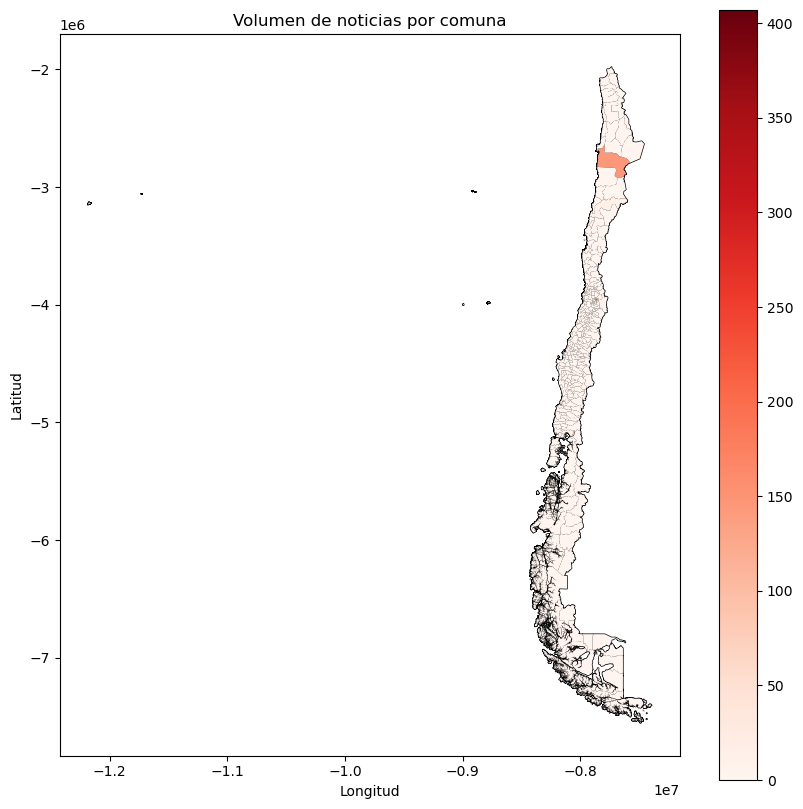

In [509]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Dibujar el mapa de Chile
chile_regions.plot(ax=ax, color='lightgrey', edgecolor='black')

# Colorear las regiones según una variable específica
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Reemplaza 'vmin' y 'vmax' con los valores mínimo y máximo de tu variable para normalizar los colores

#chile_regions.plot(ax=ax, column='variable', cmap='coolwarm', legend=True, vmin=0, vmax=100)

chile_regions.plot(ax=ax, column="value", cmap='Reds', legend=True)

# Añadir título y etiquetas de los ejes
plt.title('Volumen de noticias por comuna')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.savefig('comunas.png', dpi=2500)


# Mostrar el mapa
plt.show()

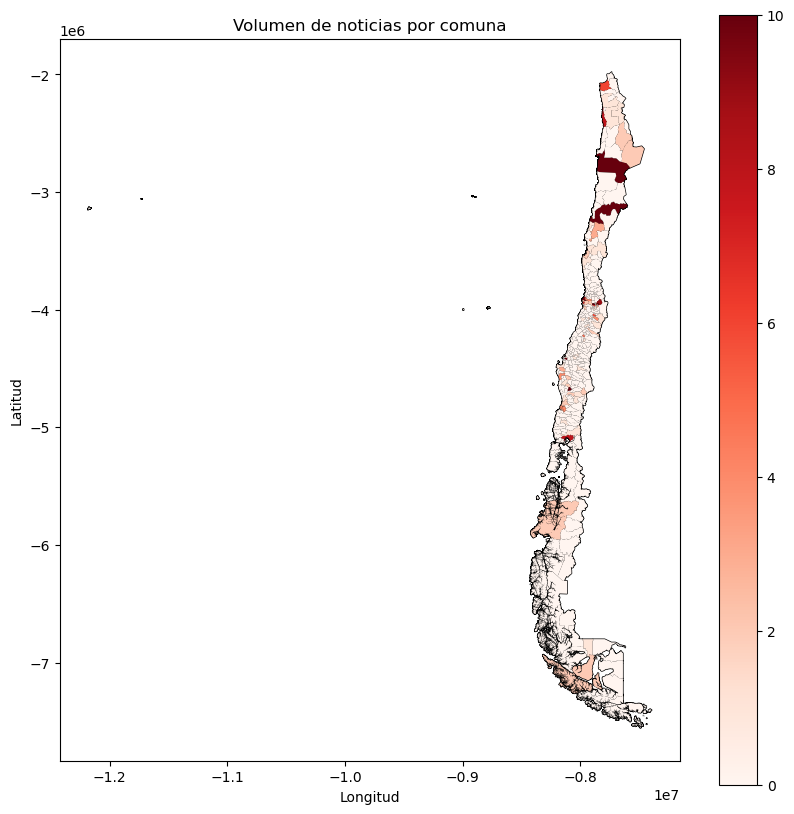

In [616]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Dibujar el mapa de Chile
chile_regions.plot(ax=ax, color='lightgrey', edgecolor='black')

# Colorear las regiones según una variable específica
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Reemplaza 'vmin' y 'vmax' con los valores mínimo y máximo de tu variable para normalizar los colores

#chile_regions.plot(ax=ax, column='variable', cmap='coolwarm', legend=True, vmin=0, vmax=100)

chile_regions.plot(ax=ax, column="value", cmap='Reds', legend=True, vmin=0, vmax=10)

# Añadir título y etiquetas de los ejes
plt.title('Volumen de noticias por comuna')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.savefig('comunas_2.png', dpi=1500)


# Mostrar el mapa
plt.show()

In [516]:

regionsDict = {}

for index, row in chile_regions.iterrows():
    key = row['codregion']
    if not(key in regionsDict):
        regionsDict[key] = 0
    regionsDict[key] += row['value']



newsQuantities2 = []
for index, row in chile_regions.iterrows():
    newsQuantities2.append(regionsDict[row['codregion']])
    

chile_regions['valueByRegion'] = newsQuantities2


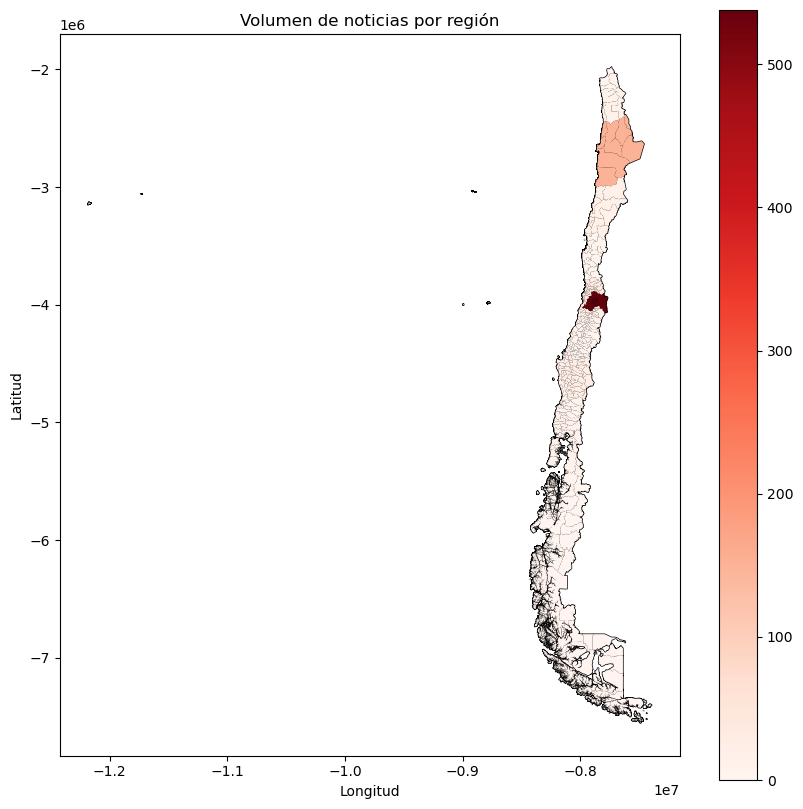

In [517]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Dibujar el mapa de Chile
chile_regions.plot(ax=ax, color='lightgrey', edgecolor='black')

# Colorear las regiones según una variable específica
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Reemplaza 'vmin' y 'vmax' con los valores mínimo y máximo de tu variable para normalizar los colores

#chile_regions.plot(ax=ax, column='variable', cmap='coolwarm', legend=True, vmin=0, vmax=100)

chile_regions.plot(ax=ax, column="valueByRegion", cmap='Reds', legend=True)

# Añadir título y etiquetas de los ejes
plt.title('Volumen de noticias por región')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.savefig('regiones.png', dpi=2500)


# Mostrar el mapa
plt.show()

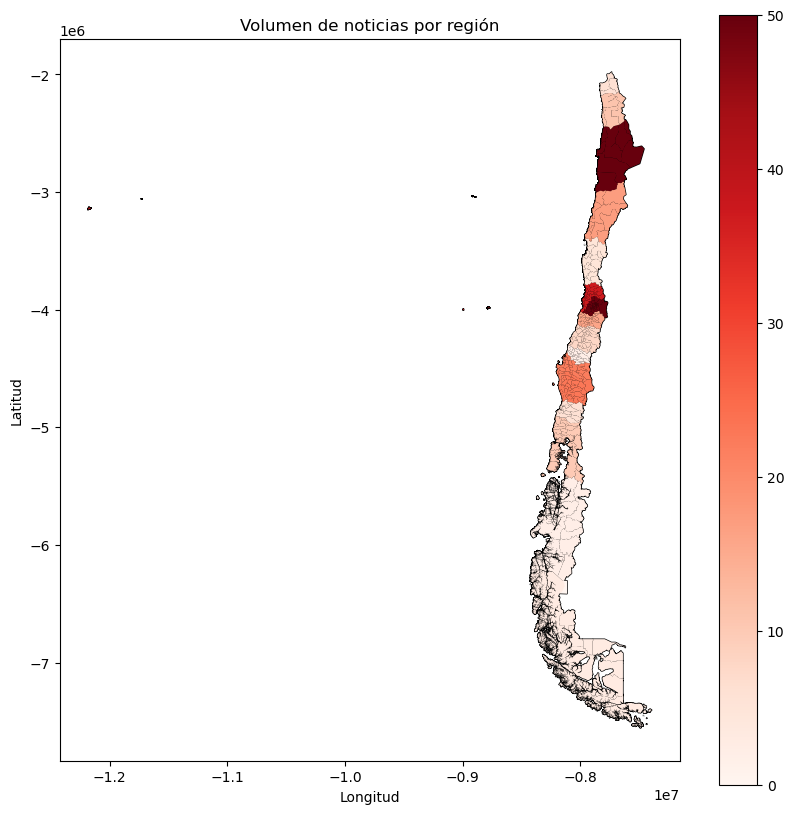

In [615]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Dibujar el mapa de Chile
chile_regions.plot(ax=ax, color='lightgrey', edgecolor='black')

# Colorear las regiones según una variable específica
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Reemplaza 'vmin' y 'vmax' con los valores mínimo y máximo de tu variable para normalizar los colores

#chile_regions.plot(ax=ax, column='variable', cmap='coolwarm', legend=True, vmin=0, vmax=100)

chile_regions.plot(ax=ax, column="valueByRegion", cmap='Reds', legend=True, vmin=0, vmax=50)

# Añadir título y etiquetas de los ejes
plt.title('Volumen de noticias por región')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.savefig('regiones_2.png', dpi=300)


# Mostrar el mapa
plt.show()

In [520]:
regionsDict
#chile_regions.to_excel("chile_regions_2.xlsx")

{6: 16,
 9: 23,
 13: 538,
 10: 10,
 14: 6,
 7: 8,
 4: 5,
 12: 3,
 0: 0,
 5: 37,
 8: 22,
 11: 2,
 1: 11,
 15: 6,
 2: 150,
 16: 2,
 3: 17}